<h1><center>PART A</center></h1>

### 1) Import numpy, pandas, seaborn, matplotlib

In [36]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# leave this cell blank

### 2) Read the heart.csv file into a dataframe called df, and  view a 2% random sample of the data

In [38]:
# your code here
df = pd.read_csv('kaggleUCI/heart.csv')
df.sample(frac=0.02)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1


In [39]:
# leave this cell blank

### 3) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1

In [40]:
# your code here
# set up data
X = df.drop(['target'], axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
#Xtrain.head()

In [41]:
# leave this cell blank

### 4) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [42]:
# your code here
numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [43]:
# leave this cell blank

### 5) Get basic stats on Xtrain (such as count, mean, std, etc)

In [44]:
# your code here
Xtrain.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.075472,0.712264,0.966981,130.849057,243.495283,0.146226,0.533019,150.146226,0.325472,1.012736,1.438679,0.702830,2.320755
std,9.204571,0.453779,1.022887,17.626882,46.609856,0.354169,0.518697,23.465258,0.469660,1.089449,0.608794,1.007739,0.600902
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,137.750000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.500000,0.000000,2.000000
75%,60.000000,1.000000,2.000000,140.000000,271.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000


In [45]:
# leave this cell blank

### 6) Check if there are any NaNs in any of the columns in Xtrain

In [46]:
# your code here
Xtrain.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [47]:
# leave this cell blank

### 7) Create an annotated heatmap of the correlation between the numeric features in Xtrain

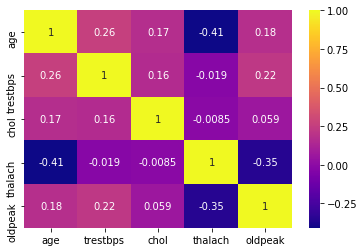

In [48]:
# your code here
sns.heatmap(Xtrain[numeric_features].corr(), annot=True, cmap='plasma')

In [49]:
# leave this cell blank

### 8) Standard Scale all of the numeric features in Xtrain, include transformed numeric features in Xtrain, and drop original numeric features in Xtrain

In [50]:
# your code here
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
Xtrainss = pd.DataFrame(ss.fit_transform(Xtrain[numeric_features]), columns=['ss_'+x for x in numeric_features],index=Xtrain.index)
Xtrain = pd.concat([Xtrain, Xtrainss], axis=1)
Xtrain.drop(numeric_features, axis=1,inplace=True)



D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
Xtrain.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,ss_age,ss_trestbps,ss_chol,ss_thalach,ss_oldpeak
34,1,3,0,0,1,2,1,2,-0.334915,-0.332611,-0.655815,-1.074173,0.356309
185,1,0,0,0,0,2,1,2,-1.097207,-1.071867,1.000106,0.121905,-0.931786
187,1,0,0,0,1,1,1,3,-0.008219,-0.389477,0.483975,-1.757646,1.092364
147,0,3,0,1,0,2,0,2,0.645174,1.089034,-0.075168,0.890812,-0.103725
202,1,0,0,0,1,2,0,3,0.427376,1.089034,0.569996,-1.672212,-0.195731


In [52]:
# leave this cell blank

### 9) OneHotEncode all of the categorical features in Xtrain, include transformed categorical features in Xtrain, and drop original categorical features in Xtrain

In [53]:
# your code here
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore')
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categorical_features]), columns=ohe.get_feature_names(categorical_features), index=Xtrain.index)
Xtrain = pd.concat([Xtrain, Xcat], axis=1)
Xtrain.drop(categorical_features, axis=1,inplace=True)
Xtrain.head()

,ss_age,ss_trestbps,ss_chol,ss_thalach,ss_oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
34,-0.334915,-0.332611,-0.655815,-1.074173,0.356309,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
185,-1.097207,-1.071867,1.000106,0.121905,-0.931786,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
187,-0.008219,-0.389477,0.483975,-1.757646,1.092364,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
147,0.645174,1.089034,-0.075168,0.890812,-0.103725,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
202,0.427376,1.089034,0.569996,-1.672212,-0.195731,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1


In [54]:
# leave this cell blank

### 10) Fit a Logistic Regression Model to training data with random_state=1

In [65]:
# your code here
from sklearn.linear_model import LogisticRegression                                                                  
lr = LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None,random_state=1)             
lr.fit(Xtrain, ytrain)                                                                                                                         # 6) fit the model to train data
                   

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=1,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [66]:
# leave this cell blank

### 11) Standard Scale all of the numeric features in Xtest, include transformed numeric features in Xtest, and drop original numeric features in Xtest

In [57]:
# your code here
Xtestss = pd.DataFrame(ss.transform(Xtest[numeric_features]), columns=['ss_'+x for x in numeric_features],index=Xtest.index)
Xtest = pd.concat([Xtest, Xtestss], axis=1)
Xtest.drop(numeric_features, axis=1,inplace=True)


D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [67]:
Xtest.head()
# leave this cell blank

,ss_age,ss_trestbps,ss_chol,ss_thalach,ss_oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
204,0.862972,1.657692,-1.709583,-0.219832,4.772635,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
159,0.209579,-0.048282,-0.483772,0.549075,-0.931786,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
219,-0.661612,-0.048282,0.268920,-0.006246,-0.931786,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
174,0.645174,-0.048282,-0.806354,-0.775153,1.276377,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
184,-0.443814,1.089034,-0.010651,-0.946022,1.460391,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


### 12) OneHotEncode all of the categorical features in Xtest, include transformed categorical features in Xtest, and drop original categorical features in Xtest

In [59]:
# your code here

Xtestcat = pd.DataFrame(ohe.transform(Xtest[categorical_features]), columns=ohe.get_feature_names(categorical_features), index=Xtest.index)
Xtest = pd.concat([Xtest, Xtestcat], axis=1)
Xtest.drop(categorical_features, axis=1,inplace=True)


In [68]:
Xtest.head()
# leave this cell blank

,ss_age,ss_trestbps,ss_chol,ss_thalach,ss_oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
204,0.862972,1.657692,-1.709583,-0.219832,4.772635,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
159,0.209579,-0.048282,-0.483772,0.549075,-0.931786,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
219,-0.661612,-0.048282,0.268920,-0.006246,-0.931786,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
174,0.645174,-0.048282,-0.806354,-0.775153,1.276377,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
184,-0.443814,1.089034,-0.010651,-0.946022,1.460391,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


### 13) Predict and Evaluate Logisitic Regression Model on Xtest

In [69]:
# your code here
ypred = lr.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8131868131868132
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [62]:
# leave this cell blank

<h1><center>Part B</center></h1>

### 14) (a) Read heart.csv file into a dataframe called df; (b) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1; (c) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [70]:
# your code here
df = pd.read_csv('kaggleUCI/heart.csv')
X = df.drop(['target'], axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [71]:
# leave this cell blank

### 15) Create a pipeline called "numeric_transformer" with a StandardScaler step called "ss" (use the same parameters that you used in Part A above)

In [72]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[('ss', StandardScaler(with_mean=True, with_std=True))])



In [73]:
# leave this cell blank

### 16) Create a pipeline called "categorical_transformer" with a OneHotEncoder step called "ohe" (use the same parameters that you used in Part A above)

In [74]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore'))])


In [75]:
# leave this cell blank

### 17) Create a column transformer called "preprocessor" with two transformers: (a) the first transformer called "num" which uses the numeric_transformer (that you defined above) on the numeric_features; and (b) the second transformer called "cat" which uses the categorical_transformer (that you defined above) on the categorical_features

In [76]:
# your code here
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='drop') # remainder='passthrough')


In [77]:
# leave this cell blank

### 18) Create a pipeline called "clf" with two steps: (a) the first step called "pp" which invokes the preprocessor you defined above; and (b) the second step called "lr" which involkes a logisitc regression model  (use the same parameters that you used in Part A above)

In [78]:
# your code here
from sklearn.linear_model import LogisticRegression                                                                  
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  
clf = Pipeline(steps=[('pp', preprocessor),
                      ('lr', LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None))])

In [79]:
# leave this cell blank

### 19) Fit the clf pipeline to the training data

In [80]:
# your code here
clf.fit(Xtrain, ytrain)

D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('pp', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak...enalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False))])

In [81]:
# leave this cell blank

### 20) Predict and Evaluate clf pipeline on Xtest (you should end up with same results as in Part A above)

In [82]:
# your code here
ypred = clf.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8131868131868132
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
# leave this cell blank